# House Prices - Advanced Regression Techniques

#### Random Forest


In [41]:
# 파일 경로 설정
# train_file_path = r"C:\Users\chosun\Downloads\house-prices-advanced-regression-techniques\train.csv"
# test_file_path = r"C:\Users\chosun\Downloads\house-prices-advanced-regression-techniques\test.csv"   # test.csv 파일 경로


## 데이터 로드 및 분석

In [42]:
import os
import urllib.request
import zipfile

# 데이터셋 다운로드 URL
url = "https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data"

print("Please download the dataset from Kaggle:")
print("1. Go to:", url)
print("2. Download 'train.csv' and 'test.csv'")
print("3. Save them in:", os.getcwd())

Please download the dataset from Kaggle:
1. Go to: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
2. Download 'train.csv' and 'test.csv'
3. Save them in: c:\Users\chosun\Desktop\Python_Script\practice


In [77]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드
train_file_path = r"C:\Users\chosun\Downloads\house-prices-advanced-regression-techniques\train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [78]:
dataset_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [79]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [80]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\chosun\AppData\Local\Temp\ipykernel_9328\3430012634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


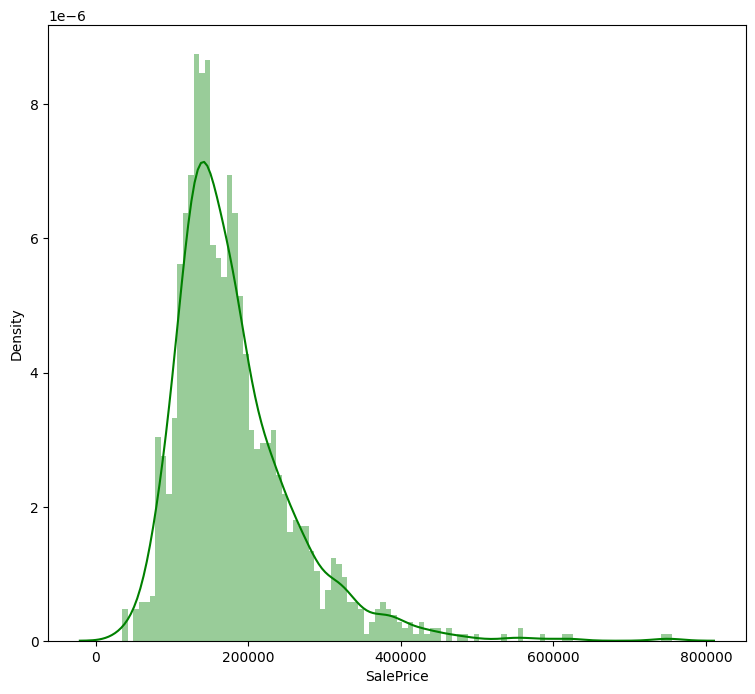

In [81]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [82]:
list(set(dataset_df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [83]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


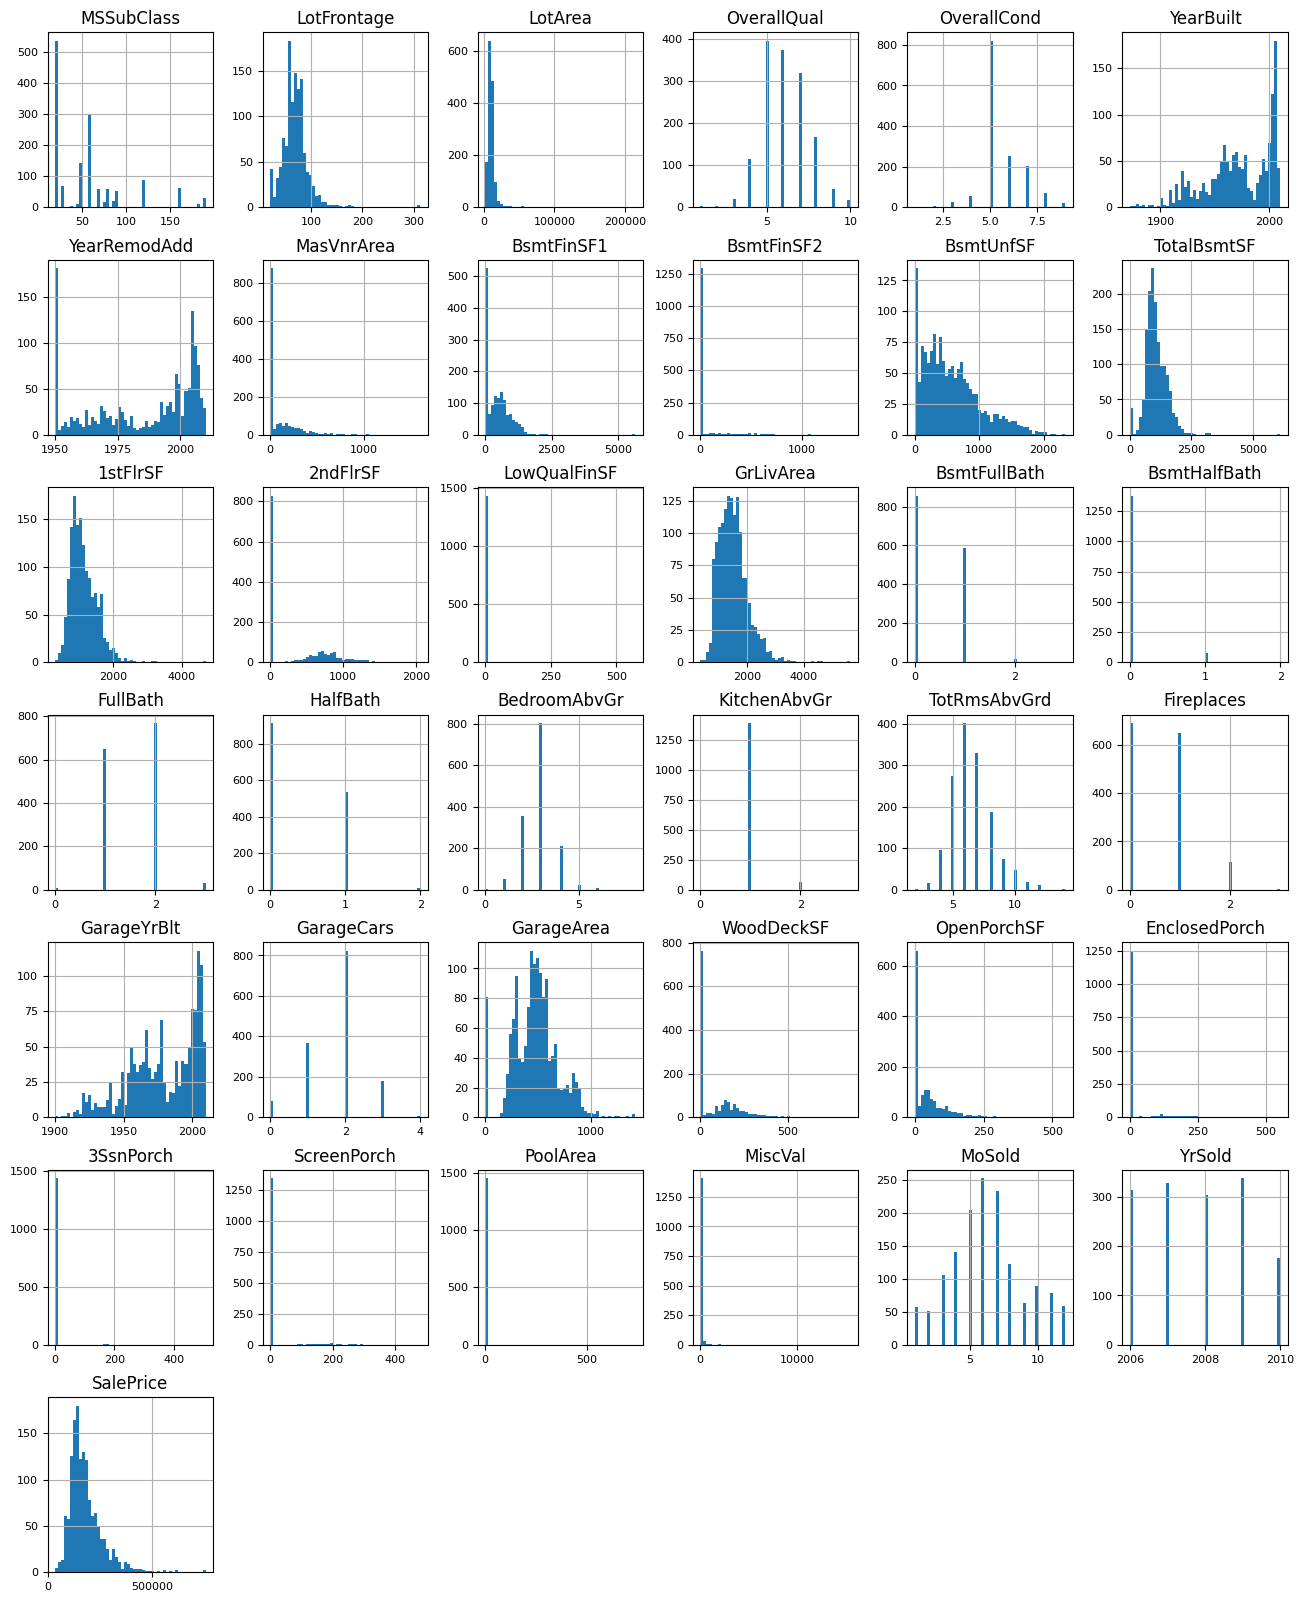

In [84]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## 데이터 전처리

In [85]:
# 2. 데이터 전처리
# 범주형 변수를 category 타입으로 변환
categorical_cols = dataset_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    dataset_df[col] = dataset_df[col].astype('category')

# 3. 데이터 분할
label = 'SalePrice'
feature_columns = dataset_df.columns.drop(label)

# 4. 훈련 데이터와 검증 데이터로 분할
train_ds_pd, valid_ds_pd = train_test_split(dataset_df, test_size=0.3, random_state=42)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

# 5. 데이터 준비
X_train = train_ds_pd[feature_columns]
y_train = train_ds_pd[label]
X_valid = valid_ds_pd[feature_columns]
y_valid = valid_ds_pd[label]

# 6. Z-score 정규화
scaler = StandardScaler()

# 수치형 데이터만 정규화
numerical_cols = X_train.select_dtypes(include=[np.number]).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_valid[numerical_cols] = scaler.transform(X_valid[numerical_cols])

1022 examples in training, 438 examples in testing.


C:\Users\chosun\AppData\Local\Temp\ipykernel_9328\4239008800.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
C:\Users\chosun\AppData\Local\Temp\ipykernel_9328\4239008800.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid[numerical_cols] = scaler.transform(X_valid[numerical_cols])


## XGB 모델 

In [92]:
# 7. DMatrix 생성
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dvalid = xgb.DMatrix(X_valid, label=y_valid, enable_categorical=True)

## 모델 훈련

In [93]:
# 8. 모델 파라미터 설정
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,  # learning rate
    'max_depth': 6,
    'seed': 42
}

# 9. 모델 훈련
num_boost_round = 1000  # Number of boosting rounds (epochs)
evals = [(dtrain, 'train'), (dvalid, 'valid')]
model = xgb.train(params, dtrain, num_boost_round=num_boost_round, evals=evals, early_stopping_rounds=10)

[0]	train-rmse:71127.42023	valid-rmse:76543.61099
[1]	train-rmse:65359.11790	valid-rmse:70735.06106
[2]	train-rmse:60096.53734	valid-rmse:65446.56774
[3]	train-rmse:55228.23674	valid-rmse:60815.10053
[4]	train-rmse:50891.70529	valid-rmse:56938.46750
[5]	train-rmse:47000.16957	valid-rmse:53132.79998
[6]	train-rmse:43365.24852	valid-rmse:50062.08611
[7]	train-rmse:40072.64067	valid-rmse:47406.76524
[8]	train-rmse:37129.92069	valid-rmse:45090.17819
[9]	train-rmse:34474.88769	valid-rmse:43086.39767
[10]	train-rmse:32035.60138	valid-rmse:41183.51420
[11]	train-rmse:29800.28833	valid-rmse:39372.44433
[12]	train-rmse:27822.23964	valid-rmse:37959.57236
[13]	train-rmse:25896.08865	valid-rmse:36515.30656
[14]	train-rmse:24211.51331	valid-rmse:35169.28889
[15]	train-rmse:22652.14757	valid-rmse:34027.54061
[16]	train-rmse:21302.47002	valid-rmse:33073.75528
[17]	train-rmse:20078.44861	valid-rmse:32322.48278
[18]	train-rmse:18814.62618	valid-rmse:31756.88889
[19]	train-rmse:17782.72956	valid-rmse:31

## 예측 및 평가

In [94]:
# 10. 모델 예측
y_pred = model.predict(dvalid)

# 11. 평가
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 26010.6414
R²: 0.9030


## 시각화

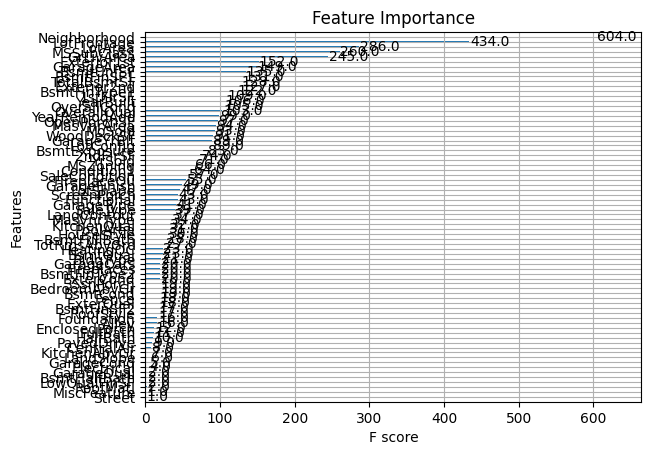

In [95]:
# 12. Feature importance 시각화
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


## 결과

In [96]:
# 13. 테스트 데이터셋 예측
test_file_path = r"C:\Users\chosun\Downloads\house-prices-advanced-regression-techniques\test.csv" 
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

# 범주형 변수를 category 타입으로 변환
for col in categorical_cols:
    test_data[col] = test_data[col].astype('category')

# 테스트 데이터 수치형 데이터 정규화
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

dtest = xgb.DMatrix(test_data, enable_categorical=True)
preds = model.predict(dtest)

# 14. 결과 저장
output = pd.DataFrame({'Id': ids, 'SalePrice': preds})
output.to_csv('submission.csv', index=False)  # 현재 디렉토리에 저장
print(output.head())

     Id      SalePrice
0  1461   81448.695312
1  1462   80842.726562
2  1463  103700.273438
3  1464  106718.015625
4  1465   97079.500000
